In [ ]:
try:
  %tensorflow_version 1.x 
except Exception:
  pass

In [ ]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [ ]:
import IPython.display as display
import matplotlib.pyplot as plt
import random
import time

from tensorflow.keras import datasets, layers, models


In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:



train_dir = '/gdrive/My Drive/aa/train'
validation_dir = '/gdrive/My Drive/aa/validation'
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3),padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3),padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3),padding='same'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.BatchNormalization(axis=-1))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=86,
      epochs=26,
      validation_data=validation_generator,
      validation_steps=29)

Epoch 1/26
86/86 [==============================] - 8s 89ms/step - loss: 0.3756 - acc: 0.8683 - val_loss: 2.5331 - val_acc: 0.3400
Epoch 2/26
86/86 [==============================] - 4s 52ms/step - loss: 0.1154 - acc: 0.9876 - val_loss: 2.9165 - val_acc: 0.3727
Epoch 3/26
86/86 [==============================] - 4s 52ms/step - loss: 0.0796 - acc: 0.9907 - val_loss: 2.5378 - val_acc: 0.4345
Epoch 4/26
86/86 [==============================] - 4s 52ms/step - loss: 0.0805 - acc: 0.9894 - val_loss: 2.9098 - val_acc: 0.3382
Epoch 5/26
86/86 [==============================] - 4s 50ms/step - loss: 0.0814 - acc: 0.9888 - val_loss: 1.1773 - val_acc: 0.4745
Epoch 6/26
86/86 [==============================] - 5s 53ms/step - loss: 0.0563 - acc: 0.9926 - val_loss: 0.6426 - val_acc: 0.7873
Epoch 7/26
86/86 [==============================] - 5s 57ms/step - loss: 0.0420 - acc: 0.9932 - val_loss: 0.4073 - val_acc: 0.8436
Epoch 8/26
86/86 [==============================] - 5s 53ms/step - loss: 0.0305 - a

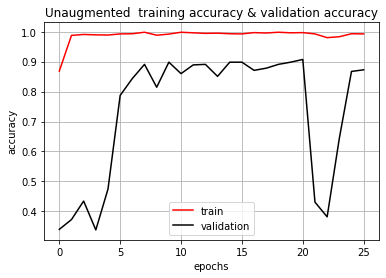

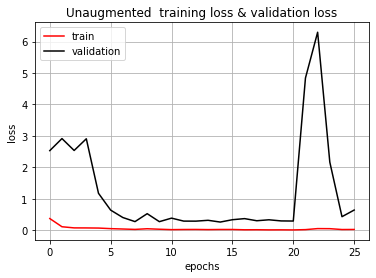

In [ ]:
def plot(label, history):
  accuracy = history.history['acc']
  validation_accuracy = history.history['val_acc']
  loss = history.history['loss']
  validation_loss = history.history['val_loss']
  epochs = range(len(accuracy))
  _ = plt.figure()
  plt.title(str(label)+ ' training accuracy & validation accuracy' )
  plt.plot(epochs, accuracy, color='red', label='train')
  plt.plot(epochs, validation_accuracy, color='black', label='validation')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.grid()
  plt.legend()
  _ = plt.figure()
  plt.title(str(label)+ ' training loss & validation loss'  )
  plt.plot(epochs, loss, color='red', label='train')
  plt.plot(epochs, validation_loss, color='black', label='validation')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.grid()
  plt.legend()

plot("Unaugmented ", history)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_dir = '/gdrive/My Drive/aa/train'
validation_dir = '/gdrive/My Drive/aa/validation'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=36,
    width_shift_range=0.24,
    height_shift_range=0.24,
    shear_range=0.24,
    zoom_range=0.24,
    horizontal_flip=True)

validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=26,class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=26,class_mode='binary')


history = model.fit_generator(
      train_generator,
      steps_per_epoch=86,
      epochs=26,
      validation_data=validation_generator,
      validation_steps=29)

Found 150 images belonging to 3 classes.
Found 150 images belonging to 3 classes.
Epoch 1/26
86/86 [==============================] - 16s 184ms/step - loss: 0.0645 - acc: 0.9754 - val_loss: 2.7557 - val_acc: 0.8233
Epoch 2/26
86/86 [==============================] - 16s 181ms/step - loss: 0.0764 - acc: 0.9726 - val_loss: 0.4661 - val_acc: 0.9192
Epoch 3/26
86/86 [==============================] - 16s 181ms/step - loss: 0.0706 - acc: 0.9758 - val_loss: 2.0502 - val_acc: 0.8822
Epoch 4/26
86/86 [==============================] - 15s 173ms/step - loss: 0.0632 - acc: 0.9782 - val_loss: 0.6014 - val_acc: 0.9041
Epoch 5/26
86/86 [==============================] - 15s 175ms/step - loss: 0.0787 - acc: 0.9772 - val_loss: 0.4927 - val_acc: 0.8973
Epoch 6/26
86/86 [==============================] - 16s 188ms/step - loss: 0.0720 - acc: 0.9768 - val_loss: 5.8776 - val_acc: 0.8452
Epoch 7/26
86/86 [==============================] - 15s 172ms/step - loss: 0.0778 - acc: 0.9753 - val_loss: 1.7766 - val

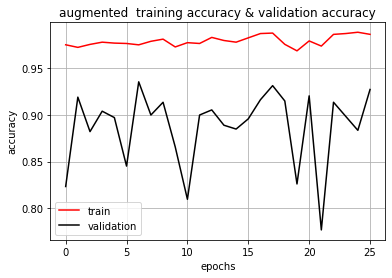

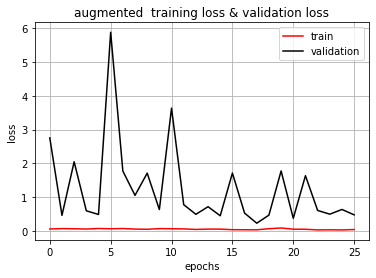

In [ ]:
def plot(label, history):
  accuracy = history.history['acc']
  validation_accuracy = history.history['val_acc']
  loss = history.history['loss']
  validation_loss = history.history['val_loss']
  epochs = range(len(accuracy))
  _ = plt.figure()
  plt.title(str(label)+ ' training accuracy & validation accuracy' )
  plt.plot(epochs, accuracy, color='red', label='train')
  plt.plot(epochs, validation_accuracy, color='black', label='validation')
  plt.xlabel('epochs')
  plt.ylabel('accuracy')
  plt.grid()
  plt.legend()
  _ = plt.figure()
  plt.title(str(label)+ ' training loss & validation loss'  )
  plt.plot(epochs, loss, color='red', label='train')
  plt.plot(epochs, validation_loss, color='black', label='validation')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.grid()
  plt.legend()

plot("augmented ", history)



result  {0:'buddha',1:'church',2:'moai'}


predicted result:  0
predicted class: buddha
actual class: buddha
path: /gdrive/My Drive/aa/validation/buddha/c27f71f1f49173e8.jpg


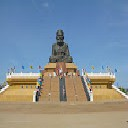



predicted result: 2
predicted class: moai
actual class: moai
path: /gdrive/My Drive/aa/validation/moai/6ac21cbf988e7045.jpg


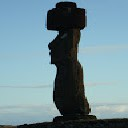



predicted result: 1
predicted class: church
actual class: church
path: /gdrive/My Drive/aa/validation/church/5f1e638f24f3c944.jpg


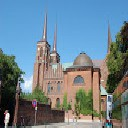

In [ ]:
#prediction 
import os
import numpy as np
from keras.preprocessing import image


buddha_dir = '/gdrive/My Drive/aa/validation/buddha'
moai_dir = '/gdrive/My Drive/aa/validation/moai'
church_dir = '/gdrive/My Drive/aa/validation/church'


buddhas = [(os.path.join(buddha_dir, fname),'buddha') for fname in os.listdir(buddha_dir)]
moais = [(os.path.join(moai_dir, fname),'moai') for fname in os.listdir(moai_dir)]
churchs = [(os.path.join(church_dir, fname),'church') for fname in os.listdir(church_dir)]

img_tup1=buddhas[10]
img_tup2=moais[12]
img_tup3=churchs[13]
 
  
label_dict = {0:'buddha',1:'church',2:'moai'}
print('\n')
print("result  {0:'buddha',1:'church',2:'moai'}")
print('\n')

test_image = image.load_img(img_tup1[0], target_size=(150,150))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image,axis=0)
result = list(model.predict(test_image)[0])
result = result.index(max(result))
print("predicted result:  " + str(result))
print("predicted class: " + label_dict[result])
print("actual class: " + str(img_tup1[1]))
print("path: " +img_tup1[0])

display.display(display.Image(img_tup1[0]))
print('\n')


test_image = image.load_img(img_tup2[0], target_size=(150,150))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image,axis=0)
result = list(model.predict(test_image)[0])
result = result.index(max(result))
print("predicted result: " + str(result))
print("predicted class: " + label_dict[result])
print("actual class: " + str(img_tup2[1]))
print("path: " +img_tup2[0])
display.display(display.Image(img_tup2[0]))
print('\n')


test_image = image.load_img(img_tup3[0], target_size=(150,150))
test_image = image.img_to_array(test_image)/255
test_image = np.expand_dims(test_image,axis=0)
result = list(model.predict(test_image)[0])
result = result.index(max(result))
print("predicted result: " + str(result))
print("predicted class: " + label_dict[result])
print("actual class: " + str(img_tup3[1]))
print("path: " +img_tup3[0])
display.display(display.Image(img_tup3[0]))
print('\n')

  


In [ ]:
from google.colab import files
model.save("/content/aa_model.h5")
files.download("/content/aa_model.h5")